# Проект № 2, выполняемый в рамках курса Data Scientist от Mathshub

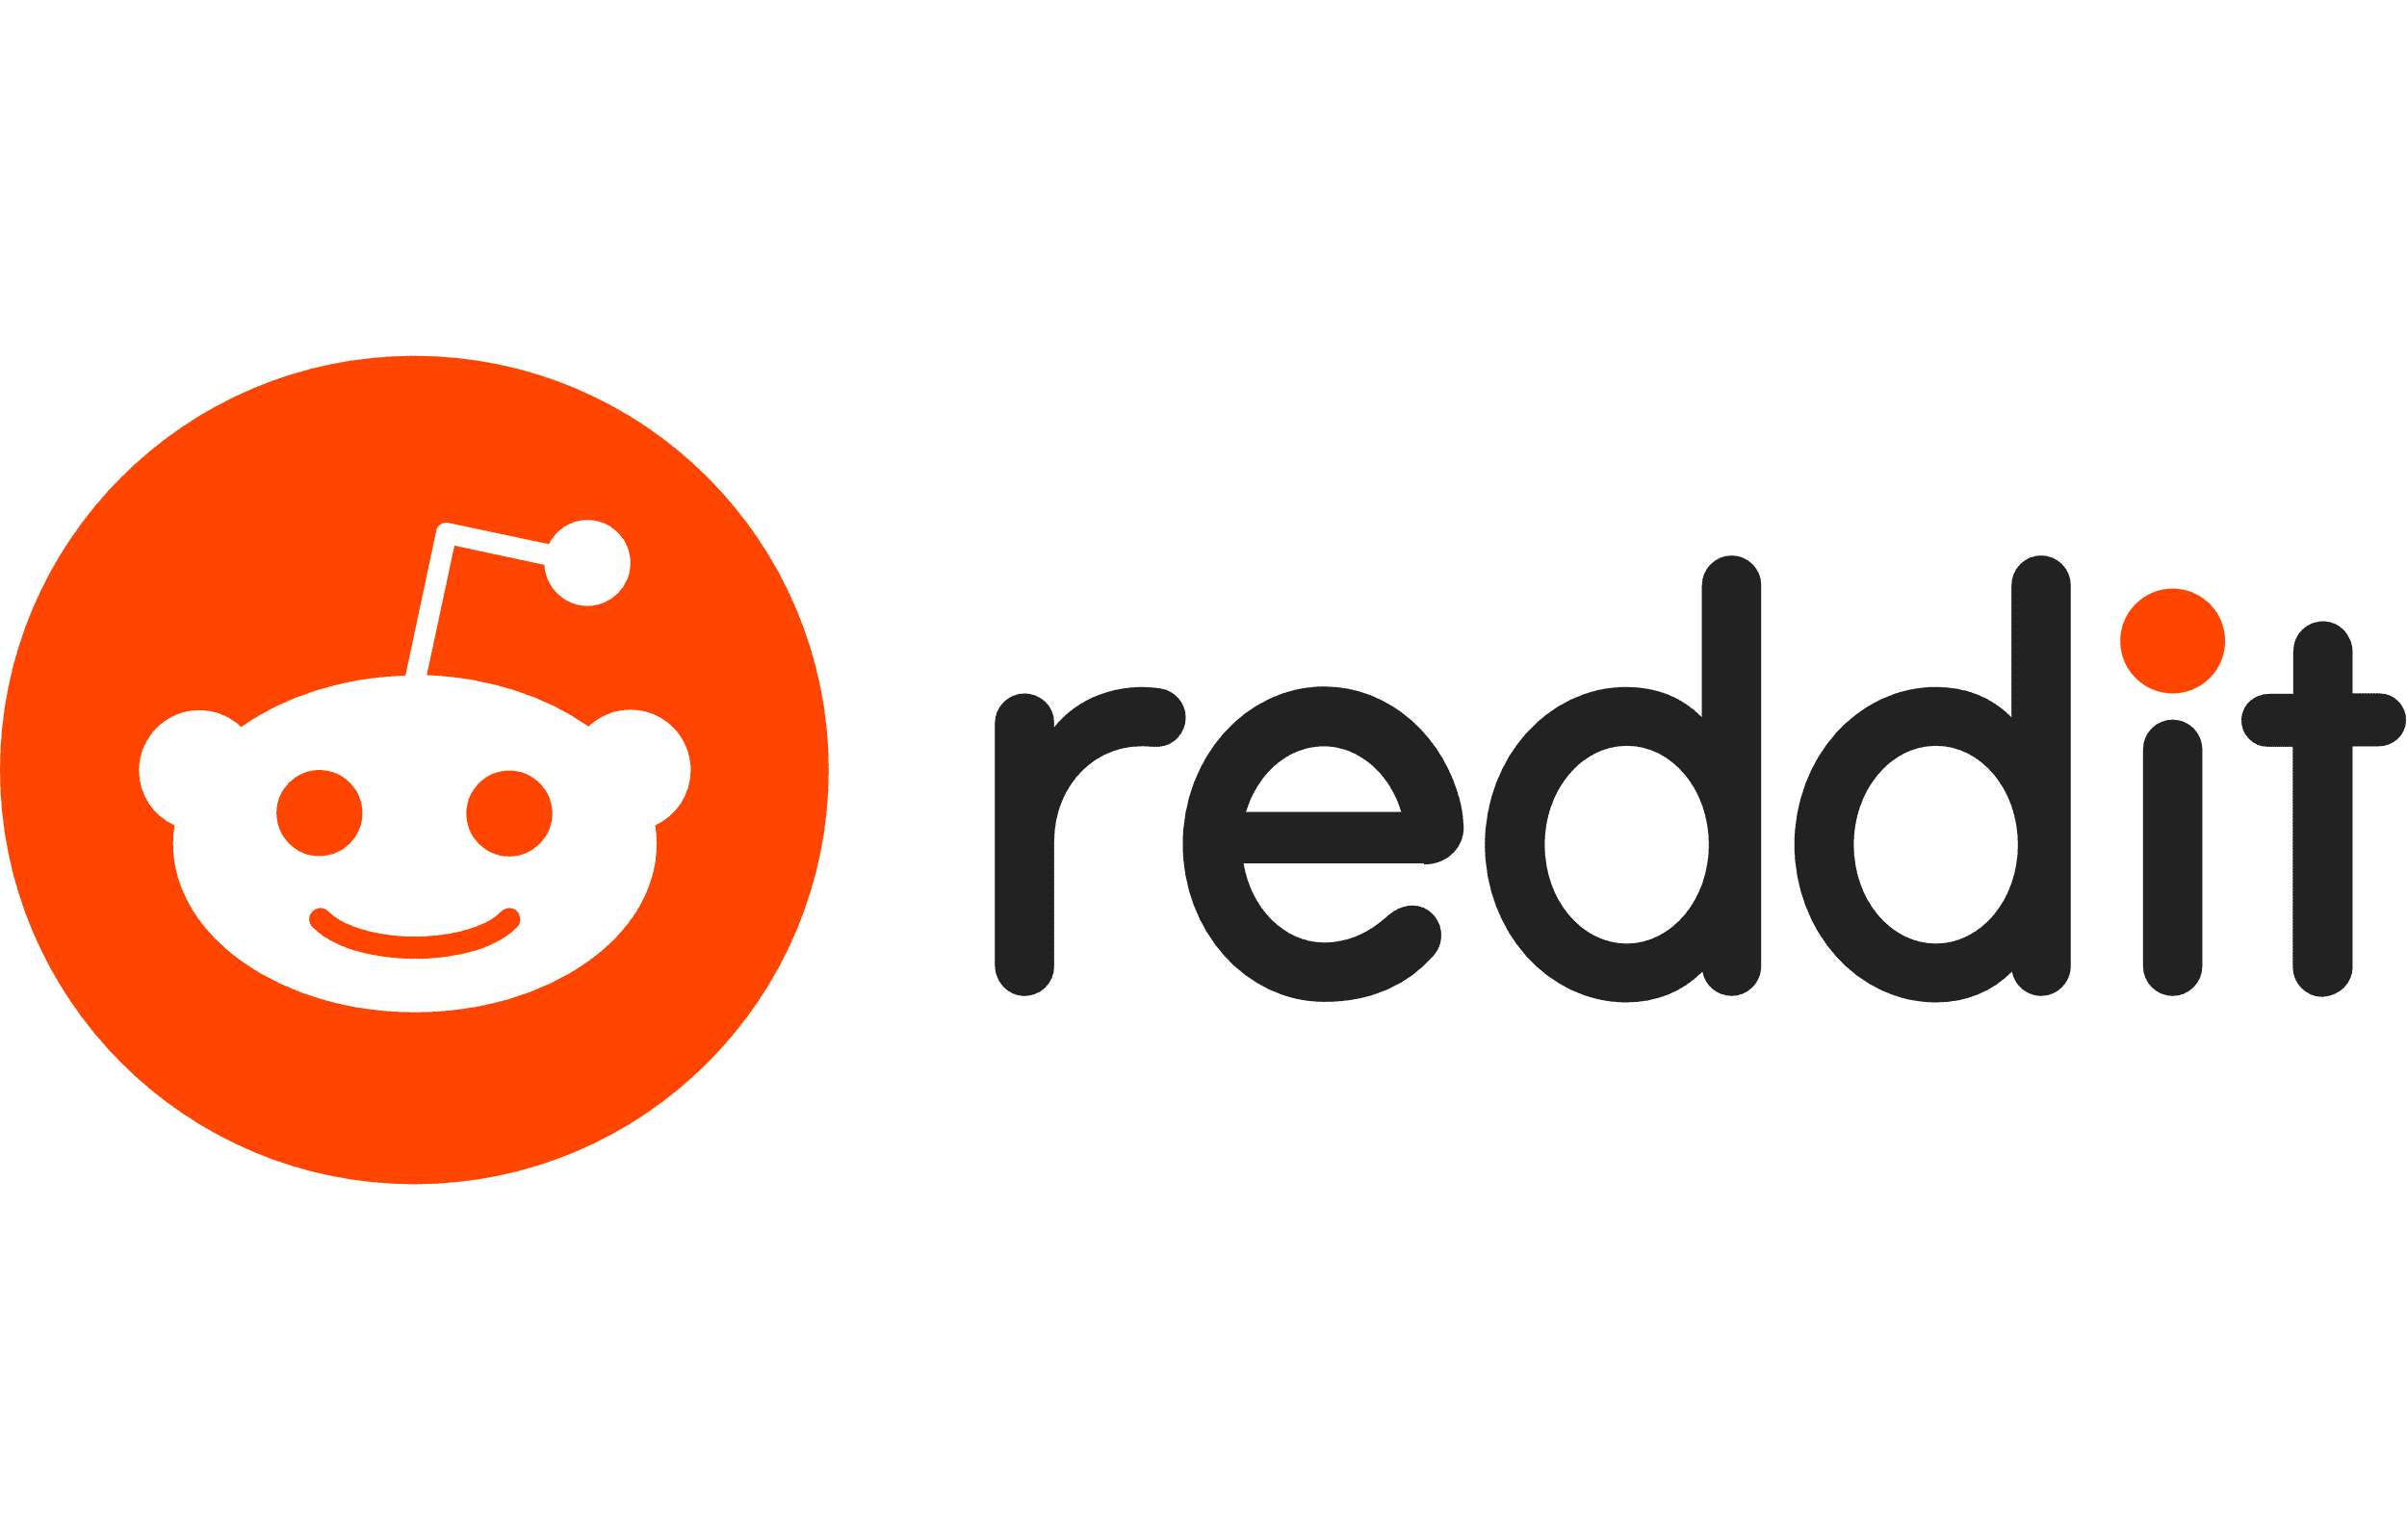

## Описание данных

**Отрасль и направления деятельности:** Анализ постов развлекательного сайта Reddit

**Задачи:**
-  Выбрать самые популярные посты (по количеству наград, по рейтингу и по количеству комментариев)
- Посмотреть кто удаляет посты на реддите и какие авторы больше всего "спамят" своими постами.
- Выяснить, есть ли посты, посвященные России, сколько их и какой у них бывает рейтинг и существуют ли просты о России, попавшие в топ-100 по рейтингу.


**План работы:**
1.   Импорт нужных библиотек и предобработка
          1.1.Импорт библиотек и загрузка файлов для работы
          1.2.Функции для предобработки
          1.3.Просмотр общей информации, типов данных и проверка на явные дубликаты
          1.4.Приведение названий колонок и просмотр первых строк датасетов
          1.5. Работа с пропусками
          1.6. Преобразование данных
          1.7. Удаление ненужных столбцов
          1.8.Вывод
2.   Исследовательский анализ данных
          2.1. Подключение к базе данных
          2.2. Самые популярные посты
            2.2.1. По количеству комментариев
            2.2.2. По количеству наград
            2.1.3. По рейтингу
          2.4. Удаленные посты
            2.4.1. Основные модераторы сайта
            2.4.2.Какие авторы создавали максимальное число удаленного контента
          2.5. Посты, посвященные России
            2.5.1. Посмотрим посты, посвященные России
            2.5.2. Сколько всего постов о России
            2.5.3. Сколько постов о России попали в топ-100 реддита по рейтингу

3.   Вывод




 **Описание датасетов:**

Датасет содержит информацию о постах с сайта *Reddit*.


---


Содержит следующие столбцы:

*id*  айди поста

*title* название поста

*score* рейтинг поста

*author* имя автора

*author_falir_text* внутренняя кодировка авторов

*removed_by* кем удален пост

*total_awards_received* сколько получено всего наград

*awarders* кто наградил

*created_utc* дата создания поста в формате UTC

*full_link* полная ссылка на пост

*num_commnets* количество комментариев

*over_18* является ли пост 18+


## Импорт нужных библиотек и предобработка

In [ ]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from warnings import simplefilter
import warnings
from plotly.subplots import make_subplots

# для работы с SQL импортируем дополнительно
import sqlite3

warnings.filterwarnings('ignore')

#кастомная цветовая схема для визуализаций
colors=['cadetblue','steelblue','darkseagreen','slateblue','lightslategray','powderblue','lavender','teal','paleturquoise', 'darkslateblue','lemonchiffon','forestgreen','mintcream']

#шаблон для даты
custom_datetime = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

#отобразим все столбцы
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150




In [ ]:
# импортируем файл
reddit = pd.read_csv('/content/drive/MyDrive/Учеба аналитика/mathshub/2-SQL/reddit_data.csv')

### Функции для предобработки

In [ ]:
def info(df):
    '''функция  для вывода общей информации о датасетах и проверка на дубликаты'''
    #название датасета
    name =[x for x in globals() if globals()[x] is df][0]
    print(f'Название датасета:{name}\n')
    #размер датасета
    print(f'Размер датасета:{df.shape}\n')
    #общая инфа о датасете
    print(f'Общая информация о датасете:')
    df.info()
    print()
    #проверка на явные дубликаты
    print(f'Дубликатов обнаружено:{df.duplicated().sum()}')
    print()
    print('*' * 70)
    print()

In [ ]:
def columns(df):
    '''функция для приведения названий колонок к удобному в работе виду и выводу пяти первых строк датасета'''
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    #название датасета
    name =[x for x in globals() if globals()[x] is df][0]
    print(f'Название датасета:{name}\n')
    #первые пять строк датасета
    print(df.head())
    print()
    print('*' * 70)
    print()

In [ ]:
def missing(df):
    '''функция для просмотра информации о пропусках'''
    #название датасета
    name =[x for x in globals() if globals()[x] is df][0]
    print(f'Название датасета:{name}\n')
    #сумма пропусков
    print(df.isna().sum().sort_values())
    print()
    print('*' * 70)
    print()

### Просмотр общей информации, типов данных и проверка на явные дубликаты


In [ ]:
info(reddit)

Название датасета:reddit

Размер датасета:(190853, 12)

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     190853 non-null  object 
 1   title                  190852 non-null  object 
 2   score                  190853 non-null  int64  
 3   author                 190853 non-null  object 
 4   author_flair_text      28845 non-null   object 
 5   removed_by             20744 non-null   object 
 6   total_awards_received  65146 non-null   float64
 7   awarders               54478 non-null   object 
 8   created_utc            190853 non-null  int64  
 9   full_link              190853 non-null  object 
 10  num_comments           190853 non-null  int64  
 11  over_18                190853 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage:

### Приведение названий колонок и просмотр первых строк датасета

In [ ]:
columns(reddit)

Название датасета:reddit

       id  \
0  ll1p9h   
1  ll1o4h   
2  ll15gx   
3  ll0iup   
4  ll0g9a   

                                                                                    title  \
0  Wordcloud of trending video titles on YouTube in the United States over 2017-2018 [OC]   
1            Wordcloud of trending videos on YouTube in the United States over 2017- 2018   
2                 Immunization in India. Source: https://niti.gov.in/content/immunisation   
3            How to quickly estimate the impact of players during a basketball game? [OC]   
4                How to quickly estimate the impact of players during a basketball game ?   

   score                author author_flair_text        removed_by  \
0      1             OmarZiada             OC: 1               NaN   
1      1             OmarZiada             OC: 1         moderator   
2      1  Professional_Napper_               NaN         moderator   
3      1              Viziball               NaN  automo

### Работа с пропусками

In [ ]:
missing(reddit)

Название датасета:reddit

id                            0
score                         0
author                        0
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
title                         1
total_awards_received    125707
awarders                 136375
author_flair_text        162008
removed_by               170109
dtype: int64

**********************************************************************



Заменим NaN в total_awards_received на 0 (часто это архивные сообщения и обычно там просто нет наград), в removed_by и title на 'unknown':

In [ ]:
nan_replace = { "removed_by": 'unknown', "title": 'unknown','total_awards_received':0.0}
reddit = reddit.fillna(nan_replace)
reddit.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube in the United States over 2017-2018 [OC],1,OmarZiada,OC: 1,unknown,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comments/ll1p9h/wordcloud_of_trending_video_titles_on_youtube_in/,0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the United States over 2017- 2018,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comments/ll1o4h/wordcloud_of_trending_videos_on_youtube_in_the/,1,False
2,ll15gx,Immunization in India. Source: https://niti.gov.in/content/immunisation,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comments/ll15gx/immunization_in_india_source/,1,False
3,ll0iup,How to quickly estimate the impact of players during a basketball game? [OC],1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comments/ll0iup/how_to_quickly_estimate_the_impact_of_players/,0,False
4,ll0g9a,How to quickly estimate the impact of players during a basketball game ?,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comments/ll0g9a/how_to_quickly_estimate_the_impact_of_players/,2,False


### Преобразование данных

У нас дата-время в формате UTC, преобразуем в более читаемый формат:

In [ ]:
reddit['create_date']=pd.to_datetime(reddit['created_utc'],unit='s')

Преобразуем такде данные столбца over_18 в формат Integer, где False = 0, а True =1:

In [ ]:
reddit.over_18.replace({True:1,False:0},inplace = True)

### Удаление ненужных столбцов

удалим ненужные нам для анализа столбцы:
- author_flair_text(так как это какая-то непонятная внутренняя кродировка сайта),
- awarders(так как в этом столбце всего одно значение и остальное пропуски),
- created_utc( так как мы уже использовали этот столбец и преобразовали дату в читаемый формат),
- full_link(для анализа нам не нуджны полные ссылки на посты).

In [ ]:
reddit = reddit.drop(['author_flair_text','awarders','created_utc','full_link'], axis = 1)
reddit.head()

,id,title,score,author,removed_by,total_awards_received,num_comments,over_18,create_date
0,ll1p9h,Wordcloud of trending video titles on YouTube in the United States over 2017-2018 [OC],1,OmarZiada,unknown,0.0,0,0,2021-02-16 11:12:41
1,ll1o4h,Wordcloud of trending videos on YouTube in the United States over 2017- 2018,1,OmarZiada,moderator,0.0,1,0,2021-02-16 11:10:29
2,ll15gx,Immunization in India. Source: https://niti.gov.in/content/immunisation,1,Professional_Napper_,moderator,0.0,1,0,2021-02-16 10:32:21
3,ll0iup,How to quickly estimate the impact of players during a basketball game? [OC],1,Viziball,automod_filtered,0.0,0,0,2021-02-16 09:43:44
4,ll0g9a,How to quickly estimate the impact of players during a basketball game ?,1,Viziball,moderator,0.0,2,0,2021-02-16 09:38:01


### Вывод

В наших данных не обнаружено дубликатов, однако имеются пропуски в некоторых столбцах. Некоторые пропуски мы смогли заполнить по смыслу. Далее мы преобразовали дату в удобный для чтения формат и удалили ненужные для анализа столбцы.


## Исследовательский анализ данных

Сделаем из нашего датафрейма таблицу в базе данных

In [ ]:
#️подключение к бд
con = sqlite3.connect('project_sql.db', timeout=10)
cursor = con.cursor()
#️загружаете вашу таблицу в бд, указав название таблицы
reddit.to_sql(con=con, name='reddit', index=False)

190853

В dbeaver был произведен коннект к базе данных, все выполненные ниже запросы работают корректно и там

Посмотрим за какой срок у нас имеются данные:

In [ ]:
years = """SELECT STRFTIME('%Y', create_date) AS date_year
            FROM reddit
            GROUP BY 1"""

cursor.execute(years)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame(rows)

,0
0,2012
1,2013
2,2014
3,2015
4,2016
5,2017
6,2018
7,2019
8,2020
9,2021


### Самые популярные посты

#### По количеству комментариев

In [ ]:
# отберем тop-5  постов по количеству комментариев

query_1 = """SELECT title, num_comments
              FROM reddit
              WHERE title != 'data_irl'
              ORDER BY 2 desc
              LIMIT 5"""

cursor.execute(query_1)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame( rows, columns=('Название', 'Количество комментариев') )

,Название,Количество комментариев
0,The best (&amp; worst) countries for raising a family (2020) [OC],12508
1,Police killing rates in G7 members [OC],10425
2,[oc] How taboo and popular are sexual fetishes? A survey of 2044 respondents.,10396
3,Worst Episode Ever? The Most Commonly Rated Shows on IMDb and Their Lowest Rated Episodes [OC],9217
4,The environmental impact of Beyond Meat and a beef patty [OC],9120


#### По количеству наград

In [ ]:
# отберем тop-5 постов по количеству полученных наград

query_2 ="""SELECT title, total_awards_received
            FROM reddit
            WHERE title != 'data_irl'
            ORDER BY 2 desc
            LIMIT 5"""

cursor.execute(query_2)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame( rows, columns=('Название', 'Количество наград') )

,Название,Количество наград
0,Robinhood is getting wrecked in the App Store [OC],93.0
1,How many leaders the Queen saw coming and going. [OC],55.0
2,"Citadel paid $88 million to Robinhood in Q3 2020 for ""order flow"", making up nearly half of Robinhood's revenue. Citadel is an investor in funds b...",54.0
3,[OC] Vegetation of Africa 2019,38.0
4,Number of Wilhelm Screams per Lord of the Rings Movie [OC],31.0


#### По рейтингу

In [ ]:
# отберем тop-5 постов по рейтингу

query_3 ="""SELECT title, score
            FROM reddit
            WHERE title != 'data_irl'
            ORDER BY 2 desc
            LIMIT 5"""

cursor.execute(query_3)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame( rows, columns=('Название', 'Рейтинг') )

,Название,Рейтинг
0,Imagine having to pay money to share your data. Save net neutrality today!,116226
1,Let's hear it for the lurkers! The vast majority of Reddit users don't post or comment. [OC],105255
2,Cause of Death - Reality vs. Google vs. Media [OC],101451
3,Gaze and foot placement when walking over rough terrain (article link in comments) [OC],99611
4,"Light Speed – fast, but slow [OC]",92686


Вывод: мы получили три варианта топ-5 постов. По рейтингу, по количеству комментариев и по количеству наград. Все топ-5 вышли абсолютно разными.

### Удаленные посты

####  Основные модераторы сайта

Посмотрим, кто чаще всего удаляет посты, исклоючив из вывода те удаления, где значится unknown

In [ ]:
# кто чаще всего удаляет посты

query_4 = """SELECT removed_by, count(distinct id) as sum_removed
          FROM reddit
          WHERE removed_by != 'unknown'
          GROUP BY removed_by
          ORDER BY 2 desc """

cursor.execute(query_4)

# делаем красивый вывод
rows = cursor.fetchall()
deleters = pd.DataFrame( rows, columns=('Кем удалено', 'Количество удалённых постов') )
deleters

,Кем удалено,Количество удалённых постов
0,moderator,14789
1,deleted,2948
2,automod_filtered,1553
3,reddit,1453
4,author,1


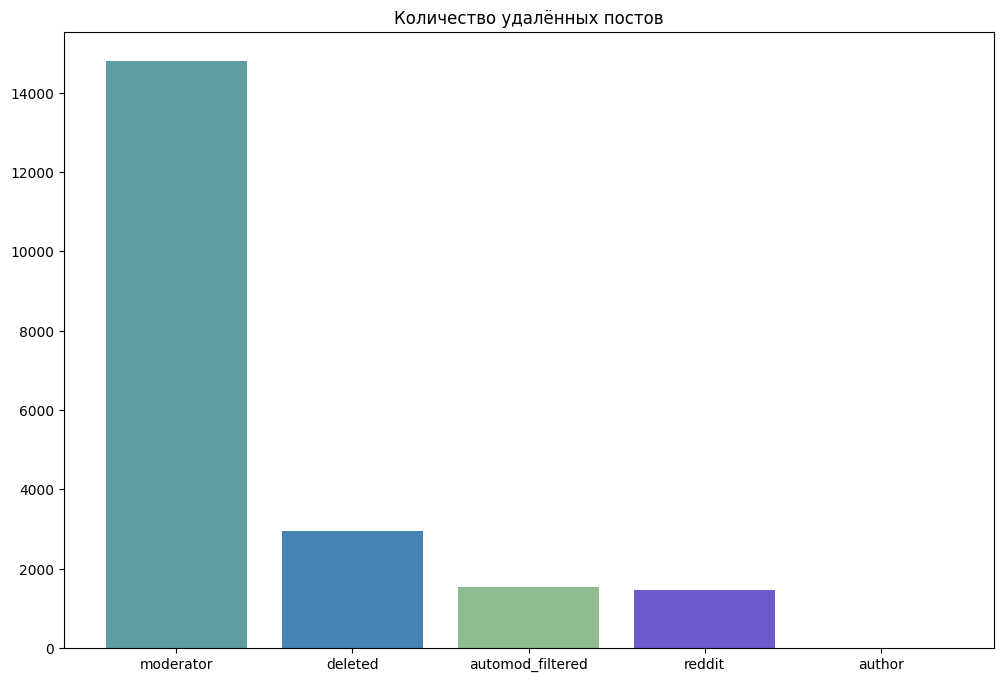

In [ ]:
removed_by = deleters['Кем удалено'].tolist()
nums = deleters['Количество удалённых постов'].tolist()

plt.figure(figsize=(12,8))
plt.title("Количество удалённых постов")
plt.bar(removed_by,nums, color=colors)

plt.show()

#### Какие авторы создавали максимальное число удаленного контента

У каких авторов больше всего удаленных постов, исключая уже удаленных:

In [ ]:
query_5 = """SELECT author, count(id) as number_of_removed_posts
FROM reddit
WHERE removed_by != 'unknown' AND author != '[deleted]'
GROUP BY author
ORDER BY 2 desc
LIMIT 5"""

cursor.execute(query_5)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame( rows, columns=('Имя автора', 'Количество удалённых постов') )

,Имя автора,Количество удалённых постов
0,hornedviper9,235
1,RohanBAbu150,62
2,Mostafa_Dahroug,45
3,peter_mladenov,35
4,PerfctSmile,31


Вывод: Чаще всего посты удалают модераторы, чья работа в этом и заключается.  Автомодератор реддита срабатывает не очень хорошо, по блокировкам он лишь на третьем месте.  Мы получили также список тех, у кого больше всего удаленных постов, но при этром, аккаунты у этих людей не зхабанены. Интересно, что же такое они всё-таки публикуют?

### Посты, посвященные России

####  Посмотрим посты, посвященные России

In [ ]:
# Посмотрим посты, где содержалось слово Russia, расположим их по рейтингу, по убыванию

query_6 = """SELECT title, score
              FROM reddit
              WHERE title LIKE '%Russia%'
              ORDER BY score DESC
              LIMIT 10"""

cursor.execute(query_6)

# делаем красивый вывод
rows = cursor.fetchall()
pd.DataFrame( rows, columns=('Название', 'Рейтинг') )

,Название,Рейтинг
0,USA vs. Russia Arms Sales from 1950 to 2017 [OC],39302
1,Areas specifically targeted by Russian FB Ads (Data from United States House of Representative’s Permanent Select Committee on Intelligence) [OC],14082
2,Suicides in Russia [OC],5466
3,"[OC] Three and a half great powers: How the US, EU, China and Russia stack up on military and economic measures of power",2583
4,GIF: Population Projection 1960-2060: Russia vs Egypt [OC],2514
5,Countries that are most dependent on Russian for gas / pay the most money,1895
6,Arms Sales: USA vs Russia,1818
7,"[OC] Comparison of causes of death of Roman Emperors, Russian Tsars, English Monarchs and United States Presidents.",1503
8,Russia's economy has grown by 800% since Putin took power.,1204
9,"USA vs Russia vs Germany: Military, Economically, Oil Resources Wise [OC]",1180


####  Сколько всего постов о России

In [ ]:
query_7 = """SELECT count(*) as posts_about_russia
			       FROM reddit r
			       WHERE title in
                    (SELECT title
                    FROM reddit
                    WHERE title LIKE '%Russia%')"""

cursor.execute(query_7)

# делаем вывод
rows = cursor.fetchall()
pd.DataFrame(rows)

,0
0,571


Вывод:  Всего на Реддите обнаружен 571 пост с упоминанием России в названии.  Топ-10 по рейтингу этих постов посвящен в основном политике России, ее вооруженным силам и ценам на нефть и газ.

#### Сколько постов о России попали в топ-100 реддита по рейтингу

In [ ]:
query_8 = """WITH a as (SELECT title, score
                        FROM reddit
                        WHERE title != 'data_irl'
                        ORDER BY 2 desc
                        LIMIT 100)

              SELECT title
              FROM a
              WHERE title LIKE '%Russia%'"""

cursor.execute(query_8)

# делаем вывод
rows = cursor.fetchall()
pd.DataFrame(rows)

,0
0,USA vs. Russia Arms Sales from 1950 to 2017 [OC]


В топ-100 Реддита по рейтингу попал всего один пост, посвященный России и это пост, посвященный сранению уровней экспорта оружия Россией ( в т.ч. СССР) и США.

## Вывод

Нами был произведен исследователький анализ данных с развлекательно - познавательного сайта Реддит.

- У нас имеются данные с 2012 по 2021 год.

- В наших данных не обнаружено дубликатов, однако имеются пропуски в некоторых столбцах. Некоторые пропуски мы смогли заполнить по смыслу. Далее мы преобразовали дату в удобный для чтения формат и удалили ненужные для анализа столбцы.  Затем мы сформировали базу данных, куда и подгрузили нашу таблицу.

- Мы выяснили, какие посты составляют топ-5 по ретингу, количеству комментариев и наградам. Проанализировали, какие пользователи создают большое количество удаленных постов, но при этом сами не забанены.  

- Также мы заметили, что большую часть работы по модерации контента выполдняют модераторы, при этом автоматическая система модерации Реддит явно нуждается в доработке. так как занимает только третье место по числу удаленных постов.

- Проанализировав посты, посвященные России, мы выяснили, что за эти годы их былол всего 571 и в топ-100 по рейтингу постов входит всего один такой пост, посвященный сранению уровней экспорта оружия Россией ( в т.ч. СССР) и США.



